<a href="https://colab.research.google.com/github/ArthAgrawal/SIH_Vegetable_Disease_Detection/blob/main/SIH_Grape_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Sep  8 07:06:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import tensorflow as tf
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")


GPU is available


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os
folder_path = '/content/drive/My Drive/Grape_Diseases'
for filename in os.listdir(folder_path):
    print(filename)

Grape___Esca_(Black_Measles)
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___Black_rot


In [5]:
import shutil
destination_path = '/content/Grape_Disease'
shutil.copytree(folder_path, destination_path)

'/content/Grape_Disease'

In [6]:
import os

folder_path = '/content/Grape_Disease'

for subdir, dirs, files in os.walk(folder_path):
    if subdir != folder_path:
        print(f"Directory: {subdir}")
        print(f"Number of files: {len(files)}")
        print()


Directory: /content/Grape_Disease/Grape___Esca_(Black_Measles)
Number of files: 1920

Directory: /content/Grape_Disease/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Number of files: 1722

Directory: /content/Grape_Disease/Grape___healthy
Number of files: 1692

Directory: /content/Grape_Disease/Grape___Black_rot
Number of files: 1888



In [7]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [8]:
import numpy as np
import os
import tensorflow as tf

# Loading the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

save_path = '/content/cifar10'

if not os.path.exists(save_path):
    os.makedirs(save_path)

np.save(os.path.join(save_path, 'train_images.npy'), train_images)
np.save(os.path.join(save_path, 'train_labels.npy'), train_labels)
np.save(os.path.join(save_path, 'test_images.npy'), test_images)
np.save(os.path.join(save_path, 'test_labels.npy'), test_labels)

print("CIFAR-10 dataset saved successfully.")


CIFAR-10 dataset saved successfully.


In [9]:
import numpy as np
import tensorflow as tf
import os
from PIL import Image

# Loading CIFAR-10 dataset
(train_images, _), (test_images, _) = tf.keras.datasets.cifar10.load_data()

# Combining train and test images
all_images = np.concatenate([train_images, test_images])

# Randomly sampling 1000 images from all images
num_images = 250  # Desired number of images
indices = np.random.choice(len(all_images), num_images, replace=False)
subset_images = all_images[indices]

save_dir = '/content/cifar10_subset'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

def save_images(images, directory):
    for i, img_array in enumerate(images):
        img = Image.fromarray(img_array)
        img.save(os.path.join(directory, f'image_{i}.png'))
        if i % 100 == 0:
            print(f"Saved {i} images.")

save_images(subset_images, save_dir)

print(f"Subset of CIFAR-10 images have been saved to {save_dir}.")


Saved 0 images.
Saved 100 images.
Saved 200 images.
Subset of CIFAR-10 images have been saved to /content/cifar10_subset.


In [10]:
import shutil
import os

src_path = '/content/cifar10_subset'
dest_path = '/content/Grape_Disease/ODD(Cifar10_Subset)'


if not os.path.exists(dest_path):
    shutil.move(src_path, dest_path)
    print(f"Moved and renamed {src_path} to {dest_path}.")
else:
    print(f"Destination directory {dest_path} already exists.")


Moved and renamed /content/cifar10_subset to /content/Grape_Disease/ODD(Cifar10_Subset).


In [11]:
import os

folder_path = '/content/Grape_Disease'

for subdir, dirs, files in os.walk(folder_path):
    if subdir != folder_path:
        print(f"Directory: {subdir}")
        print(f"Number of files: {len(files)}")
        print()


Directory: /content/Grape_Disease/Grape___Esca_(Black_Measles)
Number of files: 1920

Directory: /content/Grape_Disease/ODD(Cifar10_Subset)
Number of files: 250

Directory: /content/Grape_Disease/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Number of files: 1722

Directory: /content/Grape_Disease/Grape___healthy
Number of files: 1692

Directory: /content/Grape_Disease/Grape___Black_rot
Number of files: 1888



In [12]:
from PIL import Image
import os

def resize_images(directory, target_size):
    for filename in os.listdir(directory):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            filepath = os.path.join(directory, filename)
            with Image.open(filepath) as img:
                # Resize image
                resized_img = img.resize(target_size)
                # Save resized image
                resized_img.save(filepath)  # Overwrite the existing image or save as a new file

# Define the path and target size
odds_directory = '/content/Grape_Disease/ODD(Cifar10_Subset)'
target_size = (256, 256)

resize_images(odds_directory, target_size)


In [13]:
import shutil
import os

def delete_folder(folder_path):
    if os.path.exists(folder_path):
        try:
            shutil.rmtree(folder_path)
            print(f"Deleted folder: {folder_path}")
        except Exception as e:
            print(f"Could not delete folder {folder_path}: {e}")
    else:
        print(f"Folder does not exist: {folder_path}")

folder_path = '/content/cifar10'
delete_folder(folder_path)


Deleted folder: /content/cifar10


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [15]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 40


In [16]:
import tensorflow as tf
potato_path = '/content/Grape_Disease'

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    potato_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = dataset.class_names
print(f"Class names: {class_names}")
print(f"Number of batches: {len(dataset)}")


Found 7472 files belonging to 5 classes.
Class names: ['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'ODD(Cifar10_Subset)']
Number of batches: 234


In [17]:
len(dataset)

234

In [18]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[3 0 1 1 3 2 0 1 0 0 1 3 3 0 2 0 3 1 0 0 1 2 1 1 3 0 2 2 0 2 1 2]


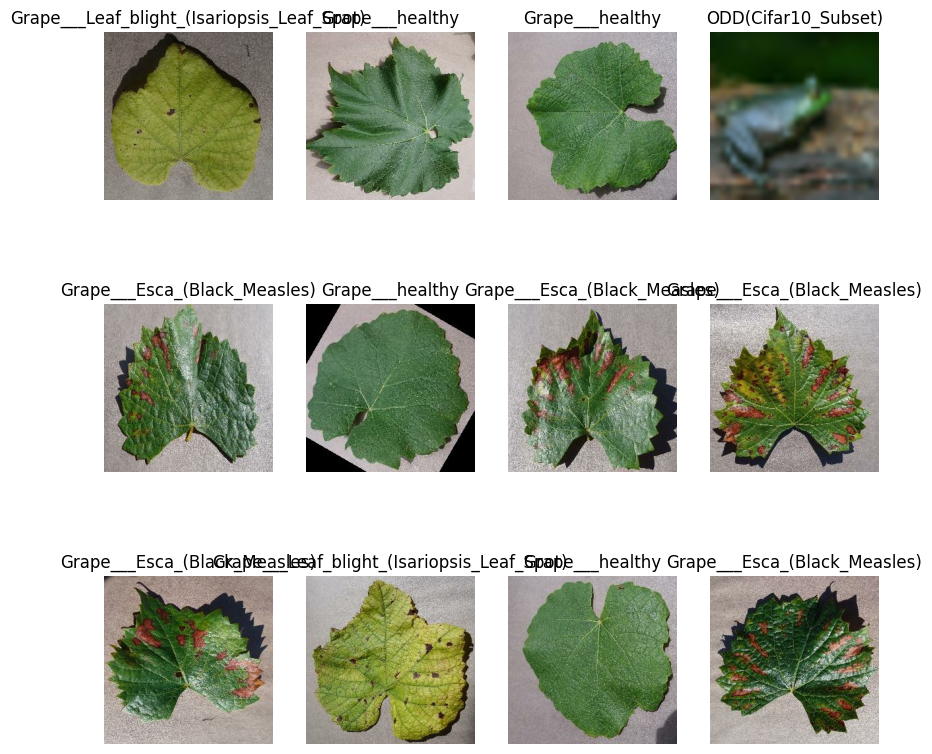

In [19]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
  for i in range (12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [20]:
import tensorflow as tf

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    potato_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Get the total number of batches
dataset_size = len(dataset)

# Define split ratios
train_size = int(dataset_size * 0.8)
val_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - val_size

# Creating train, validation, and test datasets
train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size + val_size)


Found 7472 files belonging to 5 classes.


In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [22]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

187
23
24


In [23]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomCrop(height=IMAGE_SIZE, width=IMAGE_SIZE),
    layers.RandomZoom(0.2),
])

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


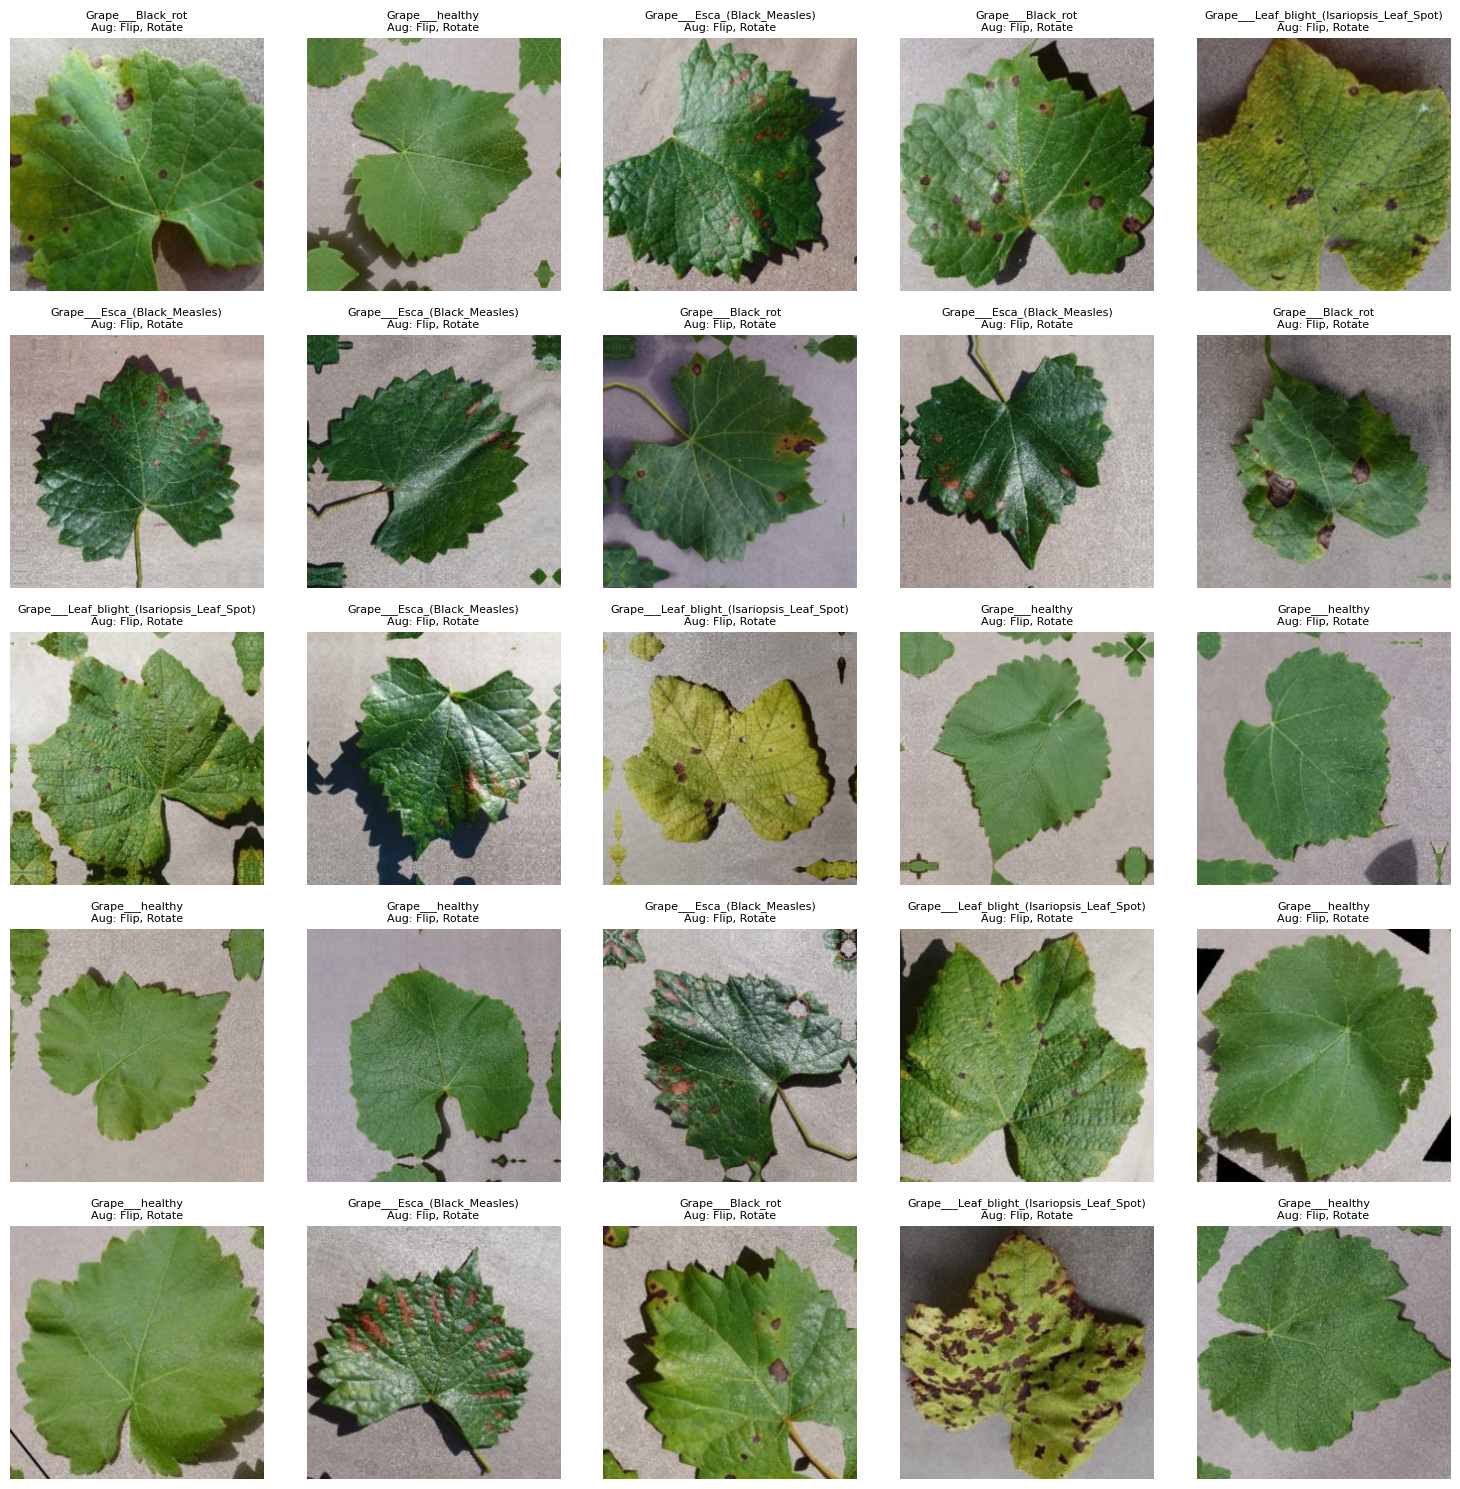

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, labels, class_names, augmentations, num_images=25):
    plt.figure(figsize=(15, 15))
    num_rows = int(np.ceil(num_images / 5))
    num_cols = min(num_images, 5)

    for i in range(min(num_images, len(images))):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        title = f"{class_names[labels[i].numpy()]}"
        if augmentations is not None:
            title += f"\nAug: {augmentations[i]}"
        plt.title(title, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def get_augmentation_labels(batch_size):
    return ["Flip, Rotate"] * batch_size

image_batch, label_batch = next(iter(train_ds))

augmentation_labels = get_augmentation_labels(len(image_batch))

show_images(image_batch, label_batch, class_names, augmentation_labels)


In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models

n_classes = 5

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model2 = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model2.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [28]:
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tqdm.keras import TqdmCallback

# Custom callback to print the epoch when early stopping occurs
class CustomEarlyStopping(EarlyStopping):
    def on_epoch_end(self, epoch, logs=None):
        super().on_epoch_end(epoch, logs)
        # Checking if training stopped early
        if self.stopped_epoch > 0:
            print(f"Early stopping triggered at epoch {self.stopped_epoch + 1}")  # +1 because epoch index is 0-based

tqdm_callback = TqdmCallback()

early_stopping = CustomEarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

history = model2.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[tqdm_callback, early_stopping],
    verbose=1
)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 99s 482ms/step - accuracy: 0.4903 - loss: 1.1204 - val_accuracy: 0.5883 - val_loss: 2.1855
Epoch 2/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 89s 476ms/step - accuracy: 0.8211 - loss: 0.4500 - val_accuracy: 0.6590 - val_loss: 1.8408
Epoch 3/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 472ms/step - accuracy: 0.8593 - loss: 0.3557 - val_accuracy: 0.7215 - val_loss: 1.0186
Epoch 4/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 471ms/step - accuracy: 0.8897 - loss: 0.2729 - val_accuracy: 0.6875 - val_loss: 1.5227
Epoch 5/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 471ms/step - accuracy: 0.9152 - loss: 0.2198 - val_accuracy: 0.7677 - val_loss: 1.0702
Epoch 6/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 469ms/step - accuracy: 0.9320 - loss: 0.1888 - val_accuracy: 0.8451 - val_loss: 0.4798
Epoch 7/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 470ms/step - accuracy: 0.9426 - loss: 0.1628 - val_accuracy: 0.7867 - val_loss: 0.8965
Epoch 8/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 468ms/step - accuracy: 0.9491 - loss: 0

In [29]:
scores = model2.evaluate(test_ds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9872 - loss: 0.0372


In [30]:
scores

[0.023507557809352875, 0.9933510422706604]

In [31]:
history

In [32]:
loss, accuracy = scores

# Converting accuracy to percentage and round to two decimal places
accuracy_percentage = round(accuracy * 100, 2)

print(f"Final accuracy of the model is: {accuracy_percentage}%")


Final accuracy of the model is: 99.34%


In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

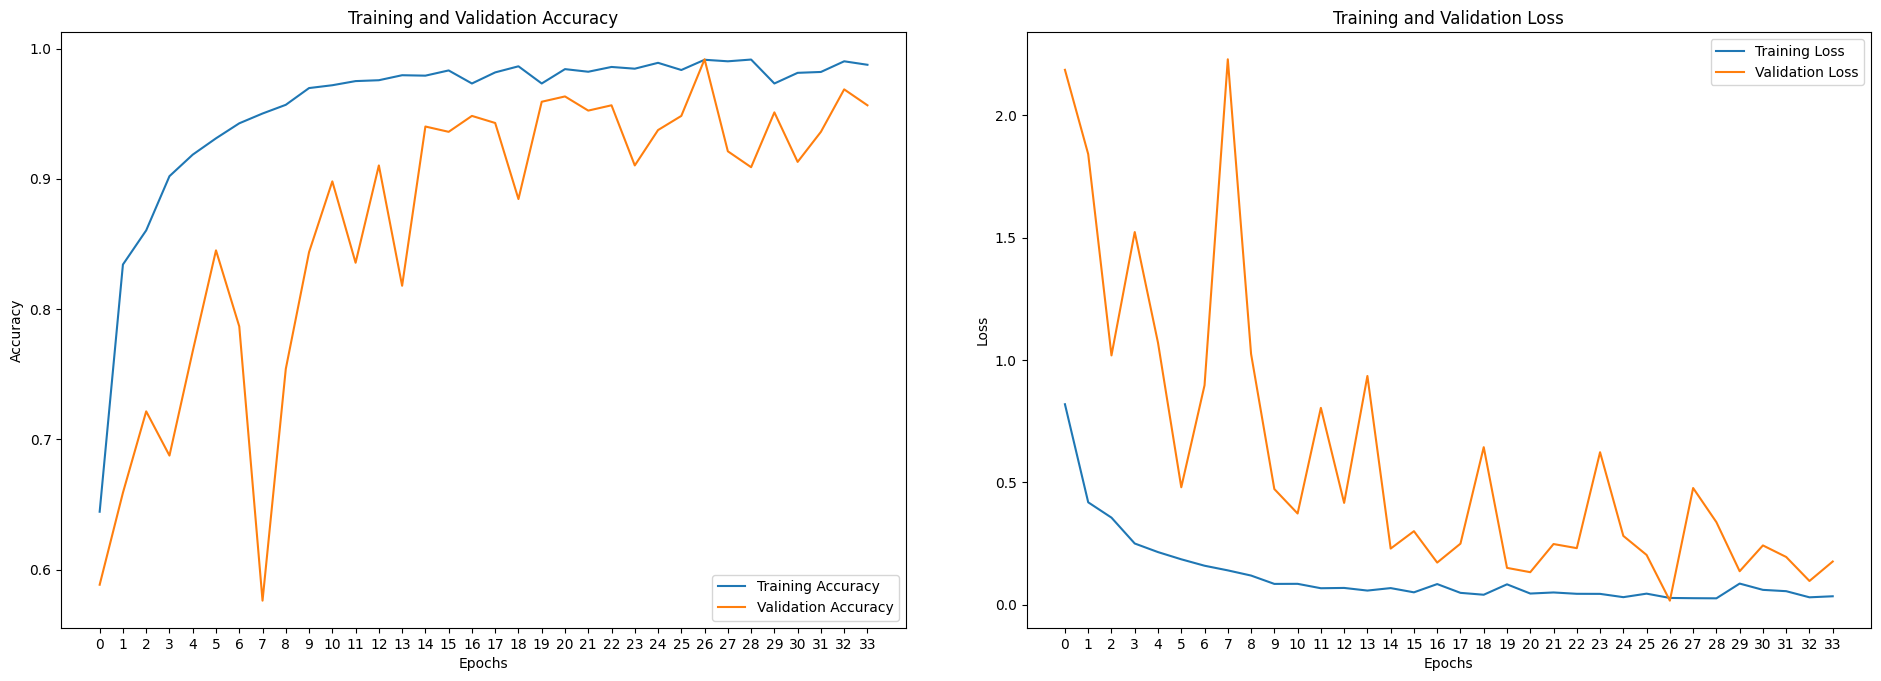

In [34]:
import matplotlib.pyplot as plt

# Get the number of epochs that were actually run
epochs_run = len(history.history['accuracy'])  # 'accuracy' or 'acc' depending on the model

# Plot the training and validation accuracy and loss
plt.figure(figsize=(20, 8))  # Increase the figure width for better spacing

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(range(epochs_run), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs_run), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  # Add x-axis label
plt.ylabel('Accuracy')  # Add y-axis label
plt.xticks(range(epochs_run))  # Set the x-ticks to show each epoch

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(epochs_run), history.history['loss'], label='Training Loss')
plt.plot(range(epochs_run), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  # Add x-axis label
plt.ylabel('Loss')  # Add y-axis label
plt.xticks(range(epochs_run))  # Set the x-ticks to show each epoch

plt.tight_layout(pad=5.0)  # Adjust subplots to fit into the figure area with padding
plt.show()


first image to predict
actual label: Grape___Black_rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
predicted label: Grape___Black_rot


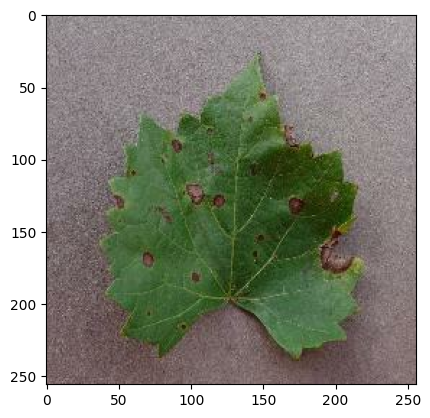

In [35]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[6].numpy().astype('uint8')
    first_label = labels_batch[6].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model2.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[6])])

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model2.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


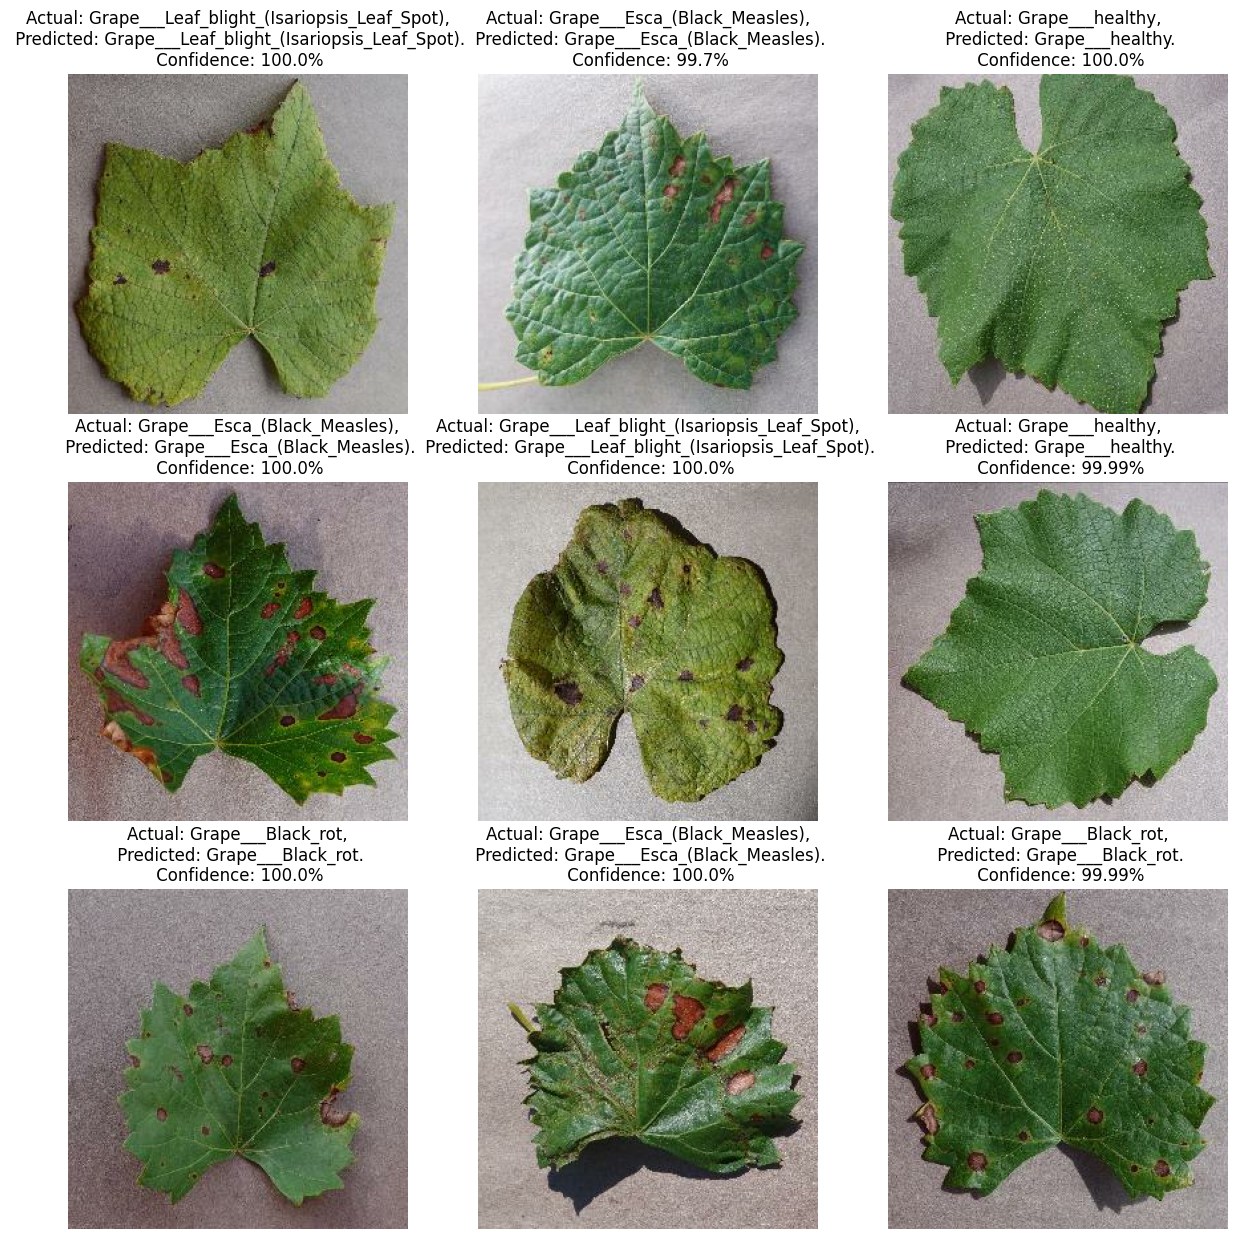

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model2, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [38]:
from google.colab import drive
import os

drive.mount('/content/drive')

model_dir = '/content/drive/MyDrive/models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_name = 'grape_model_v1.h5'

model2.save(os.path.join(model_dir, model_name))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
